## Mathematical Methods for Engineers (MathEng)
## EXAM
#### December 2023
```
Duration: 2 hrs, all documents and calculators permitted
ATTEMPT ALL QUESTIONS – ANSWER IN ENGLISH
```

- Lecture 01b - Slide 8 about convolution
- Lecture 02 - slide 3 about plotting transfer function, poles and zeros, slide 6 about frequency response from pole/zero diagram and slide 8 about  plotting them.
- Lecture 03 - slide 19 about digital filters and discrete convolution
- Lecture 04 - slide 4 about Fourier transform of a finite length data record and slide 9 about computation of the DFT
- Lecture 05 - slide 7 example With joint CDFs and PDFs
- Lecture 06 - basis for column and nullspace and Complete solution
- Lecture 07 - Slide 23 example With eigenvalue problem 


### 1. Using Euler’s identity (or any other appropriate method), write down an expression for the complex Fourier series of the signal $x(t)$:

$$
x(t) = 3 \cos( 5t) + 4 \sin( 10t)
$$

[5 marks]

In [1]:
using FFTW, LinearAlgebra

In [2]:
include("modules/operations.jl");

In [3]:
# Define Fourier coefficients
C = Dict(-10 => 2j, -5 => 3/2, 5 => 3/2, 10 => -2j)

Dict{Int64, Number} with 4 entries:
  5   => 1.5
  -5  => 1.5
  10  => 0-2im
  -10 => 0+2im

Fourier Coefficients:
C[ 5] = 1.5
C[-5] = 1.5
C[10] = 0 - 2im
C[-10] = 0 + 2im


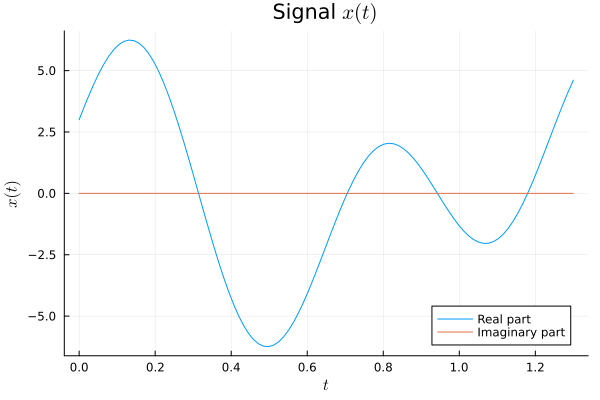

In [4]:
using Printf
using LaTeXStrings

# Function to compute the signal x(t) from the Fourier series
# function x(t)
x(t) = ∑(C[k] * ℯ^(j * k * t) for k in keys(C))
# end

# Print the Fourier coefficients
println("Fourier Coefficients:")
for (k, c) in C
    @printf("C[%2d] = %s\n", k, c)
end

# Evaluate the signal at some points
tₛ = range(0, 1.3, length=100)  # Time points
signal = [x.(t) for t in tₛ]

# Plot the signal (requires Plots.jl package)
using Plots
plot(tₛ, real(signal), label="Real part", xlabel=L"t", ylabel=L"x(t)", title="Signal " * L"x(t)")
plot!(tₛ, imag(signal), label="Imaginary part", size=(600, 400))

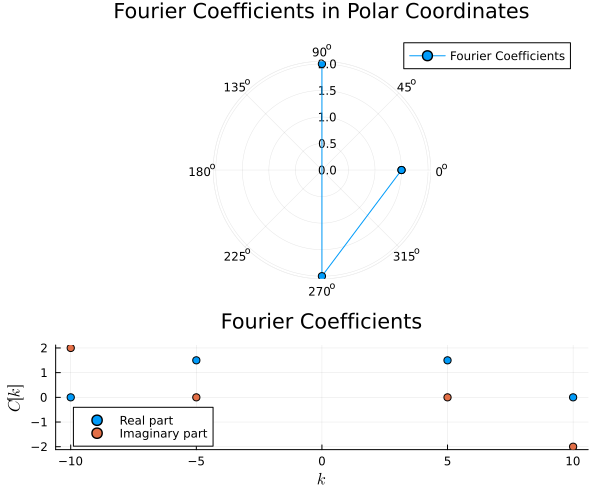

In [5]:
using Printf
using LaTeXStrings
using Plots

# Prepare data for polar plot
indices = collect(keys(C))
magnitudes = [abs(C[k]) for k in indices]
phases = [angle(C[k]) for k in indices]

# Prepare the scatter plot for Fourier coefficients
indices = collect(keys(C))
coeffs = collect(C[k] for k in indices)

# Polar plot
p1 = plot(phases, magnitudes, proj=:polar
    , marker=:circle, label="Fourier Coefficients"
)
title!(p1, "Fourier Coefficients in Polar Coordinates")

p2 = scatter(indices, 𝓡𝓮(coeffs), label="Real part", xlabel=L"k", ylabel=L"\scr{C}[k]", title="Fourier Coefficients")
scatter!(p2, indices, 𝓘𝓶(coeffs), label="Imaginary part", legend = :bottomleft)

# Display both plots with a 70-30 vertical split
plot(p1, p2, layout=grid(2, 1, heights=[0.7, 0.3]), size=(600, 500))